<a href="https://colab.research.google.com/github/joaoeliandro/microdata_enem_analysis/blob/main/analise_microdados_enem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Microdados do ENEM

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib

In [3]:
microdatasEnem = pd.read_csv("drive/MyDrive/analise_dados/brutos/microdados_enem_2020/DADOS/MICRODADOS_ENEM_2020.csv", sep=";", encoding="ISO-8859-1")

In [ ]:
microdatasEnem.head(10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,200006271946,2020,11,F,1,2,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200001195856,2020,11,M,2,3,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200001943954,2020,4,F,2,3,2,2,0,2,...,B,A,A,B,A,A,A,A,A,A
3,200001908998,2020,2,M,1,3,1,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200001634757,2020,4,F,1,3,2,1,1,1,...,A,A,A,B,A,B,B,A,A,B
5,200003132410,2020,3,F,1,3,1,1,1,1,...,B,A,A,B,B,A,D,A,B,B
6,200001379770,2020,9,M,1,3,1,1,6,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,200001334237,2020,4,M,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,200006762554,2020,5,F,2,3,1,1,3,1,...,A,A,A,B,A,A,C,A,A,A
9,200005146210,2020,2,M,1,2,1,2,0,2,...,A,A,A,B,A,A,A,A,A,B


In [ ]:
microdatasEnem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

Separating important columns

In [23]:
columnsSelectedEnem = ['TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO']

Filtering the selected microdatas

In [24]:
microdatasEnemSelected = microdatasEnem.filter(items=columnsSelectedEnem)

In [ ]:
microdatasEnemSelected.head(10)

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,...,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,11,F,1,2,1,1,11,1,NaN,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,M,2,3,1,1,11,1,NaN,0,...,595.3,711.3,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0
2,4,F,2,3,2,2,0,2,1.0,0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,M,1,3,1,2,0,2,1.0,0,...,624.2,759.4,0,1.0,140.0,200.0,140.0,120.0,160.0,760.0
4,4,F,1,3,2,1,1,1,NaN,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,F,1,3,1,1,1,1,NaN,0,...,505.4,526.7,1,1.0,140.0,120.0,140.0,140.0,160.0,700.0
6,9,M,1,3,1,1,6,1,NaN,0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4,M,1,1,1,1,1,1,NaN,0,...,562.1,753.2,0,1.0,140.0,120.0,120.0,120.0,100.0,600.0
8,5,F,2,3,1,1,3,1,NaN,0,...,486.2,448.5,1,1.0,120.0,120.0,120.0,140.0,100.0,600.0
9,2,M,1,2,1,2,0,2,1.0,0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Getting NO_MUNICIPIO_PROVA (test city) column

In [ ]:
column_no_municipio_prova = microdatasEnemSelected['NO_MUNICIPIO_PROVA']

In [ ]:
column_no_municipio_prova

0                        Belém
1                        Natal
2                     Salvador
3          Santana de Parnaíba
4                   Diamantina
                  ...         
5783104                Crateús
5783105            Três Lagoas
5783106                 Piraju
5783107                 Cuiabá
5783108               São Luís
Name: NO_MUNICIPIO_PROVA, Length: 5783109, dtype: object

Sorting and counting the test cities

In [ ]:
column_no_municipio_prova.value_counts().sort_index()

Abaetetuba               8233
Abaeté                   1140
Abreu e Lima             3644
Acarape                   714
Acaraú                   1536
                         ... 
Água Preta                580
Águas Belas              1538
Águas Formosas            680
Águas Lindas de Goiás    5391
Óbidos                   1526
Name: NO_MUNICIPIO_PROVA, Length: 1712, dtype: int64

Getting TP_FAIXA_ETARIA (age) column

In [25]:
column_tp_faixa_etaria = microdatasEnemSelected['TP_FAIXA_ETARIA']

In [ ]:
column_tp_faixa_etaria

0          11
1          11
2           4
3           2
4           4
           ..
5783104     2
5783105     3
5783106     3
5783107     4
5783108     2
Name: TP_FAIXA_ETARIA, Length: 5783109, dtype: int64

Sorting and counting the age group

In [ ]:
column_tp_faixa_etaria.value_counts().sort_index()

1     336805
2     775404
3     887715
4     609450
5     459606
6     353734
7     274709
8     239812
9     204689
10    177344
11    575442
12    341808
13    235027
14    143795
15     86079
16     47539
17     22383
18      8144
19      2693
20       931
Name: TP_FAIXA_ETARIA, dtype: int64

Creating the age group histogram

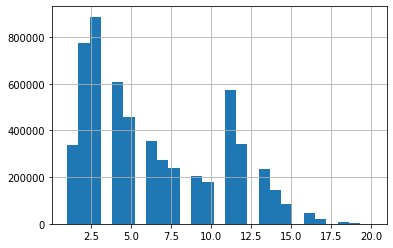

In [31]:
column_tp_faixa_etaria.hist(bins=27)

Getting SG_UF_PROVA (test state) column

In [ ]:
column_sg_uf_prova = microdatasEnemSelected['SG_UF_PROVA']

In [ ]:
column_sg_uf_prova.value_counts()

SP    910492
MG    577211
BA    447691
RJ    387480
PA    330883
CE    325680
PE    315569
RS    249130
PR    239635
MA    238272
GO    211069
PB    164965
AM    163426
PI    134678
RN    131225
SC    121153
DF    116932
ES    105812
AL    102551
MT    101727
SE     88205
MS     84548
RO     69594
TO     59209
AP     47263
AC     41824
RR     16885
Name: SG_UF_PROVA, dtype: int64

Creating the test state histogram

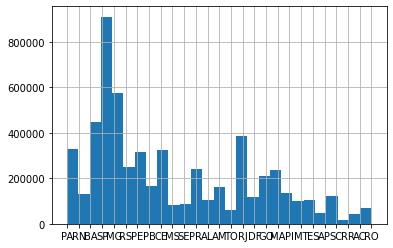

In [ ]:
column_sg_uf_prova.hist(bins=27)

Getting TP_COR_RACA (color/race) column

In [ ]:
column_tp_cor_raca = microdatasEnemSelected['TP_COR_RACA']

Distributing the values for race

In [ ]:
dist_tp_cor_raca = column_tp_cor_raca.value_counts()

Color/Race category: 


*   0 -> not declared
*   1 -> white
*   2 -> black
*   3 -> brown
*   4 -> yellow
*   5 -> indigenous



In [ ]:
dist_tp_cor_raca

3    2720485
1    2007633
2     771740
4     128522
0     116883
5      37846
Name: TP_COR_RACA, dtype: int64

Percentage calculation of each race

In [ ]:
percent_tp_cor_raca = [100*x/dist_tp_cor_raca.sum() for x in dist_tp_cor_raca]

In [ ]:
percent_tp_cor_raca

[47.041911193442836,
 34.715461873535496,
 13.344725129683704,
 2.2223686255956787,
 2.0211100983917127,
 0.6544230793505708]

Getting TP_SEXO (sex) column

In [ ]:
column_tp_sexo = microdatasEnemSelected['TP_SEXO']

Distributing the values for sex

In [ ]:
dist_tp_sexo = column_tp_sexo.value_counts()

In [ ]:
dist_tp_sexo

F    3468805
M    2314304
Name: TP_SEXO, dtype: int64

Percentage calculation of each sex

In [ ]:
percent_tp_sexo = [100*x/dist_tp_sexo.sum() for x in dist_tp_sexo]

In [ ]:
percent_tp_sexo

[59.98166384206142, 40.01833615793858]

In [ ]:
cor_raca_branca = dist_tp_cor_raca[1]
cor_raca_preta = dist_tp_cor_raca[2]
cor_raca_parda = dist_tp_cor_raca[3]
cor_raca_amarela = dist_tp_cor_raca[4]
cor_raca_indigena = dist_tp_cor_raca[5]

In [ ]:
sexFem = dist_tp_sexo[0]
sexMasc = dist_tp_sexo[1]

In [ ]:
cor_raca_preta

771740

In [ ]:
sexFem

3468805

Percentage calculation of black male people

In [ ]:
percent_cor_raca_preta_masc = 100*cor_raca_preta/sexMasc

In [ ]:
percent_cor_raca_preta_masc

33.346526644727746

Percentage calculation of people of other races male

In [ ]:
percent_other_cor_raca = 100 - percent_cor_raca_preta_masc

In [ ]:
percent_other_cor_raca

66.65347335527225

Separating important columns

In [4]:
columnsSelected = ['TP_SEXO', 'NU_NOTA_REDACAO']

Filtering the selected microdatas

In [5]:
microdatasEnemSexoRedacao = microdatasEnem.filter(items = columnsSelected)

In [6]:
microdatasEnemSexoRedacao

,TP_SEXO,NU_NOTA_REDACAO
0,F,NaN
1,M,580.0
2,F,NaN
3,M,760.0
4,F,NaN
...,...,...
5783104,F,900.0
5783105,M,660.0
5783106,F,660.0
5783107,F,NaN


Removing rows with NU_NOTA_REDACAO with NaN values

In [7]:
microdatasEnemSexoRedacao = microdatasEnemSexoRedacao.dropna()

In [9]:
microdatasEnemSexoRedacao.head()

,TP_SEXO,NU_NOTA_REDACAO
1,M,580.0
3,M,760.0
5,F,700.0
7,M,600.0
8,F,600.0


Grouping the NU_NOTA_REDACAO (written test grade) by TP_SEXO (by sex) and distributing

In [10]:
microdatasEnemSexoRedacao.groupby('TP_SEXO').count()

,NU_NOTA_REDACAO
TP_SEXO,
F,1663652
M,1090488


Grouping the NU_NOTA_REDACAO (written test grade) by TP_SEXO (by sex) and getting the max of each

In [11]:
microdatasEnemSexoRedacao.groupby('TP_SEXO').max()

,NU_NOTA_REDACAO
TP_SEXO,
F,1000.0
M,1000.0


Grouping the NU_NOTA_REDACAO (written test grade) by TP_SEXO (by sex) and getting the min of each

In [12]:
microdatasEnemSexoRedacao.groupby('TP_SEXO').min()

,NU_NOTA_REDACAO
TP_SEXO,
F,0.0
M,0.0


Grouping the NU_NOTA_REDACAO (written test grade) greater than 0 by TP_SEXO (by sex) and getting the min of each

In [13]:
microdatasEnemSexoRedacao[microdatasEnemSexoRedacao.NU_NOTA_REDACAO > 0].groupby('TP_SEXO').min()

,NU_NOTA_REDACAO
TP_SEXO,
F,40.0
M,40.0


Grouping the NU_NOTA_REDACAO (written test grade) less than 1000 by TP_SEXO (by sex) and getting the max of each

In [14]:
microdatasEnemSexoRedacao[microdatasEnemSexoRedacao.NU_NOTA_REDACAO < 1000].groupby('TP_SEXO').max()

,NU_NOTA_REDACAO
TP_SEXO,
F,980.0
M,980.0


Grouping the NU_NOTA_REDACAO (written test grade) by TP_SEXO (by sex) and getting the mean of each

In [15]:
microdatasEnemSexoRedacao.groupby('TP_SEXO').mean()

,NU_NOTA_REDACAO
TP_SEXO,
F,588.297913
M,550.703832


Grouping the NU_NOTA_REDACAO (written test grade) by TP_SEXO (by sex) and getting the median of each

In [16]:
microdatasEnemSexoRedacao.groupby('TP_SEXO').median()

,NU_NOTA_REDACAO
TP_SEXO,
F,580.0
M,560.0


Grouping the NU_NOTA_REDACAO (written test grade) by TP_SEXO (by sex) and plotting the histogram of each

TP_SEXO
F    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
M    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

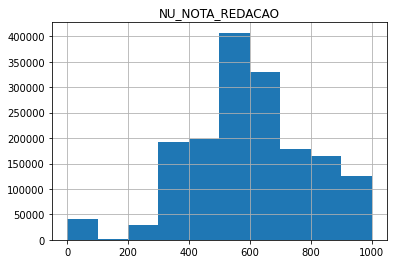

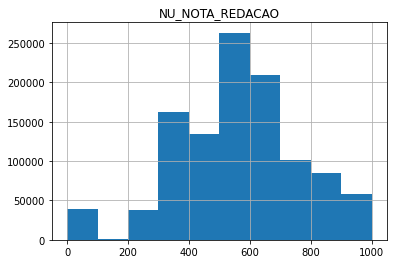

In [19]:
microdatasEnemSexoRedacao.groupby('TP_SEXO').hist()

Grouping the NU_NOTA_REDACAO (written test grade) by TP_SEXO (by sex) and getting all basic statistics

In [20]:
microdatasEnemSexoRedacao.groupby('TP_SEXO').describe()

NU_NOTA_REDACAO                                                    \
                  count        mean         std  min    25%    50%    75%   
TP_SEXO                                                                     
F             1663652.0  588.297913  196.467114  0.0  480.0  580.0  720.0   
M             1090488.0  550.703832  202.735245  0.0  420.0  560.0  680.0   

                 
            max  
TP_SEXO          
F        1000.0  
M        1000.0